In [30]:
#Import libraries
import os
os.chdir("/home/robbe/ionbot/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)
import warnings; warnings.simplefilter('ignore')

In [31]:
from sklearn.preprocessing import QuantileTransformer
def quantile_transform(quantdf, cols_to_be_transformed):
    scaler = QuantileTransformer(output_distribution= "normal")
    #quantdf[cols_to_be_transformed] = quantdf[cols_to_be_transformed].transform(np.log2)
    #quantdf.replace([np.inf, -np.inf], 0, inplace=True)
    #quantdf.replace(0, np.nan, inplace=True)
    quantdf[cols_to_be_transformed] = scaler.fit_transform(quantdf[cols_to_be_transformed])
    return quantdf

In [32]:
def median_centering(quantdf, cols_to_be_transformed):
    quantdf = quantdf.replace(0, np.nan)
    quantdf = quantdf[cols_to_be_transformed].transform(np.log2)
    quantdf = quantdf[cols_to_be_transformed].transform(lambda x: (x-x.median()))
    quantdf = quantdf[cols_to_be_transformed].transform(lambda x: (x-x.min()))
    return quantdf


# PXD022545

In [33]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD022545/mzml_files/QuantifiedPeptides.tsv", sep="\t")

In [34]:
quant.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,4.283847e+05,3.554282e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,MSMS,MBR,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAAGDSDSWDADAFSVEDPVRK12|[5]Carbamyl[S],AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J_HUMAN,NaN,NaN,4.218002e+05,0.000000e+00,3.702424e+05,4.467311e+05,5.416972e+05,4.739509e+05,MSMS,NotDetected,MBR,MBR,MBR,MBR,NaN
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,1.234217e+07,6.922745e+06,2.289945e+07,1.128366e+07,7.312890e+06,2.035148e+07,MSMS,MSMS,MSMS,MBR,MBR,MSMS,NaN
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,NaN,NaN,6.348020e+05,9.899626e+05,4.568023e+05,5.797466e+05,1.731816e+05,1.732903e+05,MBR,MSMS,MBR,MBR,MBR,MBR,NaN
4,AAAAADLANRnan,AAAAADLANR,NaN,NaN,NaN,4.915239e+05,9.159294e+05,6.800227e+05,9.423547e+05,7.290827e+05,8.027582e+05,MBR,MBR,MBR,MBR,MBR,MSMS,NaN


In [35]:
cols = ["Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234", "Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719", "Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239","Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01","Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02","Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03"]

In [36]:
quant[cols] = quant[cols].transform(np.log2)
quant.replace([np.inf, -np.inf], np.nan, inplace=True)

In [37]:
quant

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,18.708547,18.439198,NaN,NaN,NaN,NaN,MSMS,MBR,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAAGDSDSWDADAFSVEDPVRK12|[5]Carbamyl[S],AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J_HUMAN,NaN,NaN,18.686200,NaN,18.498110,18.769047,19.047127,18.854378,MSMS,NotDetected,MBR,MBR,MBR,MBR,NaN
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,23.557093,22.722913,24.448810,23.427732,22.802010,24.278631,MSMS,MSMS,MSMS,MBR,MBR,MSMS,NaN
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,NaN,NaN,19.275947,19.917014,18.801210,19.145063,17.401927,17.402832,MBR,MSMS,MBR,MBR,MBR,MBR,NaN
4,AAAAADLANRnan,AAAAADLANR,NaN,NaN,NaN,18.906902,19.804877,19.375223,19.845911,19.475723,19.614606,MBR,MBR,MBR,MBR,MBR,MSMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34439,YYTVFDRDNNRnan,YYTVFDRDNNR,CATD_HUMAN,NaN,NaN,NaN,21.288251,17.405195,22.810213,23.212167,22.866402,NotDetected,MBR,MBR,MSMS,MBR,MBR,NaN
34440,YYTVFDRnan,YYTVFDR,CATD_HUMAN,NaN,NaN,23.912277,24.432912,24.241373,24.839655,24.410443,24.475315,MSMS,MSMS,MSMS,MBR,MSMS,MBR,NaN
34441,YYVTIIDAPGHRDFIKnan,YYVTIIDAPGHRDFIK,NaN,NaN,NaN,21.069976,21.554548,22.416263,20.359512,17.004889,22.243194,MBR,MBR,MSMS,MBR,MBR,MBR,NaN
34442,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,24.573382,24.870090,25.505844,24.377755,23.681334,25.766640,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN


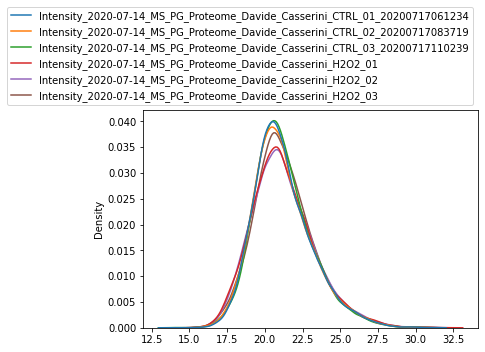

In [38]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [39]:
quantile_transform(quant, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,-1.458743,-1.600993,NaN,NaN,NaN,NaN,MSMS,MBR,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAAGDSDSWDADAFSVEDPVRK12|[5]Carbamyl[S],AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J_HUMAN,NaN,NaN,-1.475589,NaN,-1.622624,-1.255172,-1.087372,-1.308203,MSMS,NotDetected,MBR,MBR,MBR,MBR,NaN
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,1.176102,0.845531,1.537399,1.086005,0.815580,1.435905,MSMS,MSMS,MSMS,MBR,MBR,MSMS,NaN
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,NaN,NaN,-1.070543,-0.617998,-1.426518,-1.031319,-2.179484,-2.169841,MBR,MSMS,MBR,MBR,MBR,MBR,NaN
4,AAAAADLANRnan,AAAAADLANR,NaN,NaN,NaN,-1.321196,-0.691092,-1.028544,-0.631539,-0.842509,-0.859833,MBR,MBR,MBR,MBR,MBR,MSMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34439,YYTVFDRDNNRnan,YYTVFDRDNNR,CATD_HUMAN,NaN,NaN,NaN,0.204963,-2.308480,0.841871,0.984261,0.877135,NotDetected,MBR,MBR,MSMS,MBR,MBR,NaN
34440,YYTVFDRnan,YYTVFDR,CATD_HUMAN,NaN,NaN,1.315888,1.491949,1.457803,1.579182,1.428699,1.505509,MSMS,MSMS,MSMS,MBR,MSMS,MBR,NaN
34441,YYVTIIDAPGHRDFIKnan,YYVTIIDAPGHRDFIK,NaN,NaN,NaN,0.080658,0.336251,0.731342,-0.343743,-2.503545,0.596753,MBR,MBR,MSMS,MBR,MBR,MBR,NaN
34442,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,1.546572,1.632808,1.885025,1.433058,1.166310,1.929389,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN


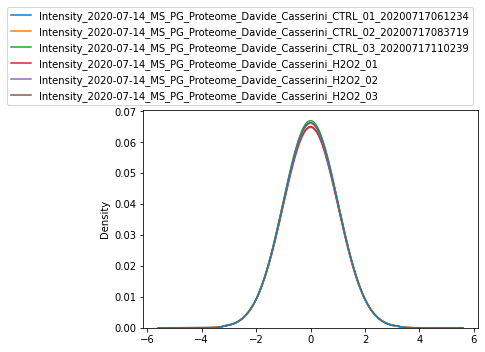

In [40]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [41]:
quant[cols] = quant[cols].transform(lambda x: x-(quant["Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719"].min()))

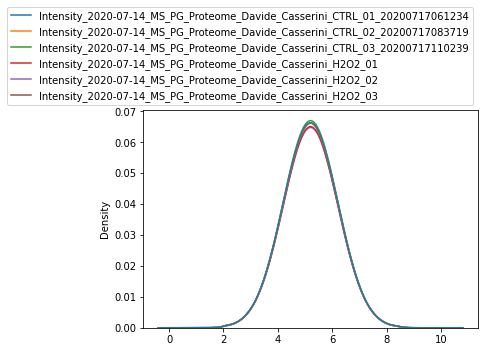

In [42]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

# PXD014381

In [43]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD014381/mzml_files/QuantifiedPeptides.tsv", sep="\t")

In [44]:
cols = ['Intensity_QX01983',
       'Intensity_QX01981_160316090220', 'Intensity_QX01867',
       'Intensity_QX01870', 'Intensity_QX01873', 'Intensity_QX01862',
       'Intensity_QX01865', 'Intensity_QX01868', 'Intensity_QX01984',
       'Intensity_QX01874', 'Intensity_QX01860', 'Intensity_QX01863',
       'Intensity_QX01866', 'Intensity_QX01869', 'Intensity_QX01872']

In [45]:
quant[cols] = quant[cols].transform(np.log2)
quant.replace([np.inf, -np.inf], np.nan, inplace=True)

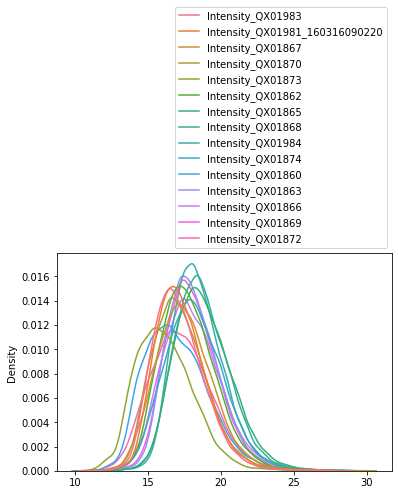

In [46]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

More normalization needed

In [47]:
quantile_transform(quant, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_QX01983,Intensity_QX01981_160316090220,Intensity_QX01867,Intensity_QX01870,Intensity_QX01873,...,Detection Type_QX01865,Detection Type_QX01868,Detection Type_QX01984,Detection Type_QX01874,Detection Type_QX01860,Detection Type_QX01863,Detection Type_QX01866,Detection Type_QX01869,Detection Type_QX01872,Unnamed: 35
0,AAAAAAAAAAAAAAAAGATCLER20|[935]Atto495Maleimid...,AAAAAAAAAAAAAAAAGATCLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAAAAAGAAGGR0|[1]Acetyl[N-TERM],AAAAAAAAAAGAAGGR,PABP2_HUMAN,NaN,NaN,NaN,NaN,0.904682,0.624751,0.310739,...,MBR,MBR,MBR,MSMS,MBR,MSMS,MBR,MBR,MBR,NaN
2,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
3,AAAAAAAAVPSAGPAGPAPTSAAGR0|[9999530]Methyl_2H(...,AAAAAAAAVPSAGPAGPAPTSAAGR,IRS2_HUMAN,NaN,NaN,-0.617929,-0.751228,-0.727392,-1.090966,-0.893715,...,MBR,MBR,MBR,MSMS,MBR,MBR,MBR,MBR,MBR,NaN
4,AAAAAAAAVPSAGPAGPAPTSAAGRnan,AAAAAAAAVPSAGPAGPAPTSAAGR,IRS2_HUMAN,NaN,NaN,-0.048873,-0.200255,0.030838,0.089337,0.352382,...,MSMS,MSMS,MSMS,MSMS,MBR,MSMS,MSMS,MSMS,MSMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39163,YYVTIIDAPGHR2|[4]Carbamidomethyl[Y],YYVTIIDAPGHR,NaN,NaN,NaN,0.274204,1.353368,1.295082,1.212283,-1.537698,...,MBR,MBR,MSMS,NotDetected,MBR,MBR,MBR,MSMS,MBR,NaN
39164,YYVTIIDAPGHRDFIK16|[320]Nethylmaleimide+water[K],YYVTIIDAPGHRDFIK,NaN,NaN,NaN,-2.061285,1.581424,1.450408,-0.355949,0.246089,...,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MSMS,NaN
39165,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,2.475882,2.780146,2.683766,2.670655,2.329484,...,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN
39166,YYVTIIDAPNHR10|Gly->Asn[G],YYVTIIDAPNHR,NaN,NaN,NaN,-1.189841,NaN,1.222634,NaN,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN


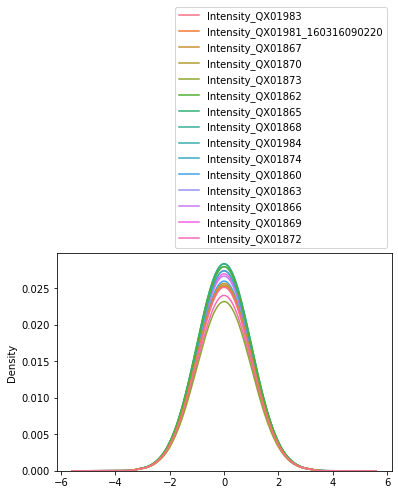

In [48]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [49]:
quant[cols] = quant[cols].transform(lambda x: x-(quant["Intensity_QX01983"].min()))

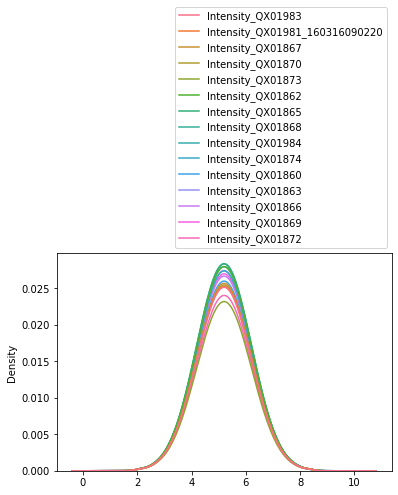

In [50]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

# PXD015122

In [51]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD015122/mzml_files/QuantifiedPeptides.tsv", sep="\t")

In [52]:
cols = ['Intensity_111017-MCF10A-RFP-gal-to-gal-wcl-D1-07',
       'Intensity_111017-MCF10A-RFP-gal-to-gal-wcl-D2-19',
       'Intensity_111717-MCF10A-RFP-gal-to-gal-wcl-JS-30ACN-D1-07',
       'Intensity_111717-MCF10A-RFP-gal-to-gal-wcl-JS-30ACN-D2-19',
       'Intensity_111017-MCF10A-RFP-glu-to-glu-wcl-D1-02',
       'Intensity_111017-MCF10A-RFP-glu-to-glu-wcl-D2-14',
       'Intensity_111717-MCF10A-RFP-glu-to-glu-wcl-JS-30ACN-D1-02',
       'Intensity_111717-MCF10A-RFP-glu-to-glu-wcl-JS-30ACN-D2-14',
       'Intensity_111017-MCF10A-RFP-glu-to-gal-wcl-D1-04',
       'Intensity_111017-MCF10A-RFP-glu-to-gal-wcl-D2-16',
       'Intensity_111717-MCF10A-RFP-glu-to-gal-wcl-JS-30ACN-D1-04',
       'Intensity_111717-MCF10A-RFP-glu-to-gal-wcl-JS-30ACN-D2-16',
       'Intensity_111017-MCF10A-MYC-gal-to-gal-wcl-D1-08',
       'Intensity_111017-MCF10A-MYC-gal-to-gal-wcl-D2-20',
       'Intensity_111717-MCF10A-MYC-gal-to-gal-wcl-JS-30ACN-D1-08',
       'Intensity_111717-MCF10A-MYC-gal-to-gal-wcl-JS-30ACN-D2-20',
       'Intensity_111017-MCF10A-MYC-glu-to-glu-wcl-D1-05',
       'Intensity_111017-MCF10A-MYC-glu-to-glu-wcl-D2-17',
       'Intensity_111717-MCF10A-MYC-glu-to-glu-wcl-JS-30ACN-D1-05',
       'Intensity_111717-MCF10A-MYC-glu-to-glu-wcl-JS-30ACN-D2-17',
       'Intensity_111017-MCF10A-MYC-glu-to-gal-wcl-D1-09',
       'Intensity_111017-MCF10A-MYC-glu-to-gal-wcl-D2-21',
       'Intensity_111717-MCF10A-MYC-glu-to-gal-wcl-JS-30ACN-D1-09',
       'Intensity_111717-MCF10A-MYC-glu-to-gal-wcl-JS-30ACN-D2-21',
       'Intensity_111017-MCF10A-mAKT-gal-to-gal-wcl-D1-10',
       'Intensity_111017-MCF10A-mAKT-gal-to-gal-wcl-D2-22',
       'Intensity_111717-MCF10A-mAKT-gal-to-gal-wcl-JS-30ACN-D1-10',
       'Intensity_111717-MCF10A-mAKT-gal-to-gal-wcl-JS-30ACN-D2-22',
       'Intensity_111017-MCF10A-mAKT-glu-to-glu-wcl-D1-06',
       'Intensity_111017-MCF10A-mAKT-glu-to-glu-wcl-D2-18',
       'Intensity_111717-MCF10A-mAKT-glu-to-glu-wcl-JS-30ACN-D1-06',
       'Intensity_111717-MCF10A-mAKT-glu-to-glu-wcl-JS-30ACN-D2-18',
       'Intensity_111017-MCF10A-mAKT-glu-to-gal-wcl-D1-03',
       'Intensity_111017-MCF10A-mAKT-glu-to-gal-wcl-D2-15',
       'Intensity_111717-MCF10A-mAKT-glu-to-gal-wcl-JS-30ACN-D1-03',
       'Intensity_111717-MCF10A-mAKT-glu-to-gal-wcl-JS-30ACN-D2-15',]

In [53]:
quant[cols] = quant[cols].transform(np.log2)
quant.replace([np.inf, -np.inf], np.nan, inplace=True)

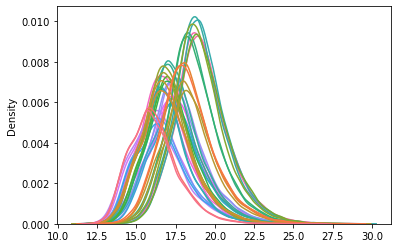

In [54]:
ax = sns.kdeplot(data=quant[cols], legend=False)


In [55]:
quantile_transform(quant, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_111017-MCF10A-RFP-gal-to-gal-wcl-D1-07,Intensity_111017-MCF10A-RFP-gal-to-gal-wcl-D2-19,Intensity_111717-MCF10A-RFP-gal-to-gal-wcl-JS-30ACN-D1-07,Intensity_111717-MCF10A-RFP-gal-to-gal-wcl-JS-30ACN-D2-19,Intensity_111017-MCF10A-RFP-glu-to-glu-wcl-D1-02,...,Detection Type_111717-MCF10A-MYC-gal-to-gal-wcl-JS-30ACN-D2-20,Detection Type_111017-MCF10A-MYC-glu-to-glu-wcl-D1-05,Detection Type_111017-MCF10A-MYC-glu-to-glu-wcl-D2-17,Detection Type_111717-MCF10A-MYC-glu-to-glu-wcl-JS-30ACN-D1-05,Detection Type_111717-MCF10A-MYC-glu-to-glu-wcl-JS-30ACN-D2-17,Detection Type_111017-MCF10A-MYC-glu-to-gal-wcl-D1-09,Detection Type_111017-MCF10A-MYC-glu-to-gal-wcl-D2-21,Detection Type_111717-MCF10A-MYC-glu-to-gal-wcl-JS-30ACN-D1-09,Detection Type_111717-MCF10A-MYC-glu-to-gal-wcl-JS-30ACN-D2-21,Unnamed: 77
0,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,-0.102533,0.117005,NaN,-1.437435,-1.027162,...,NotDetected,NotDetected,NotDetected,NotDetected,MSMSIdentifiedButNotQuantified,MBR,MSMS,MSMS,MSMS,NaN
1,AAAAAAAAAAAAAAAGAGAGAKx|[931]Ethyl+Deamidated[N],AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,NaN,NaN,-0.888380,-0.357482,NaN,...,MBR,NotDetected,NotDetected,MSMS,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
2,AAAAAAAAAAAAAAASGFAYPGTSERx|[1000]AHA-Alkyne[M],AAAAAAAAAAAAAAASGFAYPGTSER,;HXD13_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
3,AAAAAAAAAAAAAAASGFAYPGTSERx|[31]Pyridylethyl[C],AAAAAAAAAAAAAAASGFAYPGTSER,NaN,NaN,NaN,-0.010194,1.396086,NaN,NaN,0.778268,...,NotDetected,MBR,MBR,NotDetected,NotDetected,MBR,MSMS,NotDetected,NotDetected,NaN
4,AAAAAAAAAAAAAAATAASAAASAILGGR23|[928]MercaptoE...,AAAAAAAAAAAAAAATAASAAASAILGGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59130,YYTVFDRnan,YYTVFDR,CATD_HUMAN,NaN,NaN,-0.101694,-0.012487,0.301338,0.491384,0.798622,...,MBR,MSMS,MSMS,MBR,MBR,MBR,MBR,NotDetected,NotDetected,NaN
59131,YYVTIIDAPGHR1|[5]Carbamyl[Y],YYVTIIDAPGHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
59132,YYVTIIDAPGHRDFIKnan,YYVTIIDAPGHRDFIK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotDetected,MBR,NotDetected,NotDetected,NotDetected,MBR,NotDetected,NotDetected,NotDetected,NaN
59133,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,MBR,NotDetected,NaN


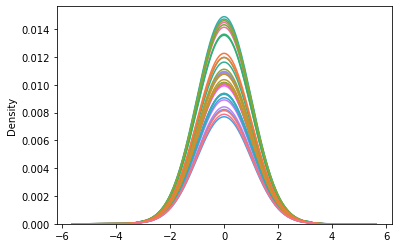

In [56]:
ax = sns.kdeplot(data=quant[cols], legend=False)


In [57]:
quant[cols] = quant[cols].transform(lambda x: x-(quant["Intensity_111017-MCF10A-RFP-gal-to-gal-wcl-D1-07"].min()))

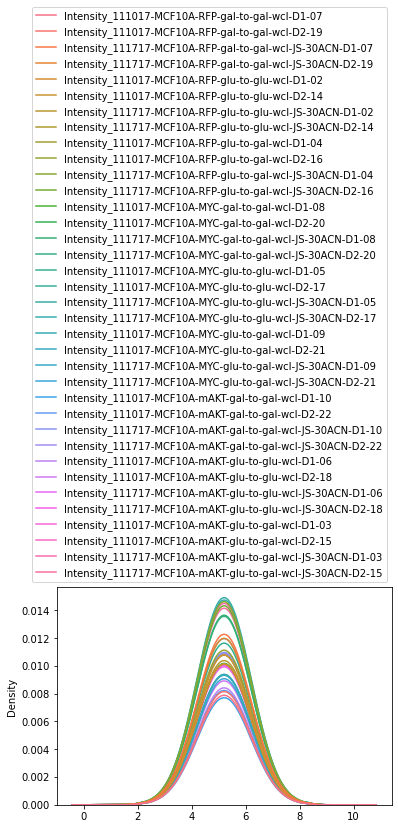

In [58]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [59]:
from sklearn.preprocessing import QuantileTransformer
def quantile_transform(quantdf, cols_to_be_transformed):
    scaler = QuantileTransformer(output_distribution= "normal")
    quantdf[cols_to_be_transformed] = quantdf[cols_to_be_transformed].transform(np.log2)
    quantdf.replace([np.inf, -np.inf], 0, inplace=True)
    quantdf.replace(0, np.nan, inplace=True)
    quantdf[cols_to_be_transformed] = scaler.fit_transform(quantdf[cols_to_be_transformed])
    quantdf[cols] = quantdf[cols].transform(lambda x: x - (quantdf[cols_to_be_transformed[0]].min()))
    return quantdf

# PXD016278

In [60]:
#quant = pd.read_csv("/home/robbe/ionbot/PXD016278/raw_files/QuantifiedPeptides.tsv", sep= "\t")
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD016278/flashlfq/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type')), axis = 1, inplace = True)
quant.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction01,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction02R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction03_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction04_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction05_R2,...,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction16,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction17,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction18,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction19,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction20,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction21,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction22,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction23,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction24,Unnamed: 101
0,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,...,0.000000e+00,6.157306e+05,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,NaN
1,AAAAAAAAAKnan,AAAAAAAAAK,PHX2B_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,NaN
2,AAAAAAAAAVSRR12|[981]glucosone[R],AAAAAAAAAVSRR,NaN,NaN,NaN,3.159841e+06,194429.501953,0.000000e+00,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,NaN
3,AAAAAAAAGAFAGRR14|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,...,1.407283e+06,1.882486e+06,0.0,0.0,0.0,0.0,0.0,2.078671e+07,0.0,NaN
4,AAAAAAAAGAFAGRR15|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000e+00,0.000000,4.562765e+06,8516465.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,NaN


In [61]:
cols = ['Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction01',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction02R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction03_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction04_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction05_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction06_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction07_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction08_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction09_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction10_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction11_180630160426',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction12',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction13',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction14',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction15',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction16',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction17',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction18',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction19',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction20',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction21',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction22',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction23',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction24',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction01',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction02R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction03',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction04',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction05',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction06',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction07',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction08',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction09',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction10',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction11',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction12',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction13',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction14',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction15',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction16',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction17',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction18',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction19',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction20',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction21',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction22',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction23',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction24']

In [62]:
quant = quantile_transform(quant, cols)

In [63]:
quant

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction01,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction02R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction03_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction04_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction05_R2,...,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction16,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction17,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction18,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction19,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction20,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction21,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction22,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction23,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction24,Unnamed: 101
0,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.453759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAAAAAAAAKnan,AAAAAAAAAK,PHX2B_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAAAAAAAVSRR12|[981]glucosone[R],AAAAAAAAAVSRR,NaN,NaN,NaN,5.519201,4.073814,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAAAAAGAFAGRR14|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.623358,5.201009,NaN,NaN,NaN,NaN,NaN,5.994613,NaN,NaN
4,AAAAAAAAGAFAGRR15|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,NaN,NaN,5.589806,5.880564,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108603,YYYAVYDMVVR8|[35]oxidation[M],YYYAVYDMVVR,LAMB1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108604,YYYAVYDMVVRnan,YYYAVYDMVVR,LAMB1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.274014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108605,YYYDGKDYIEFNK6|[4]Carbamidomethyl[K],YYYDGKDYIEFNK,ZA2G_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.468950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108606,YYYDGKDYIEFNKnan,YYYDGKDYIEFNK,ZA2G_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


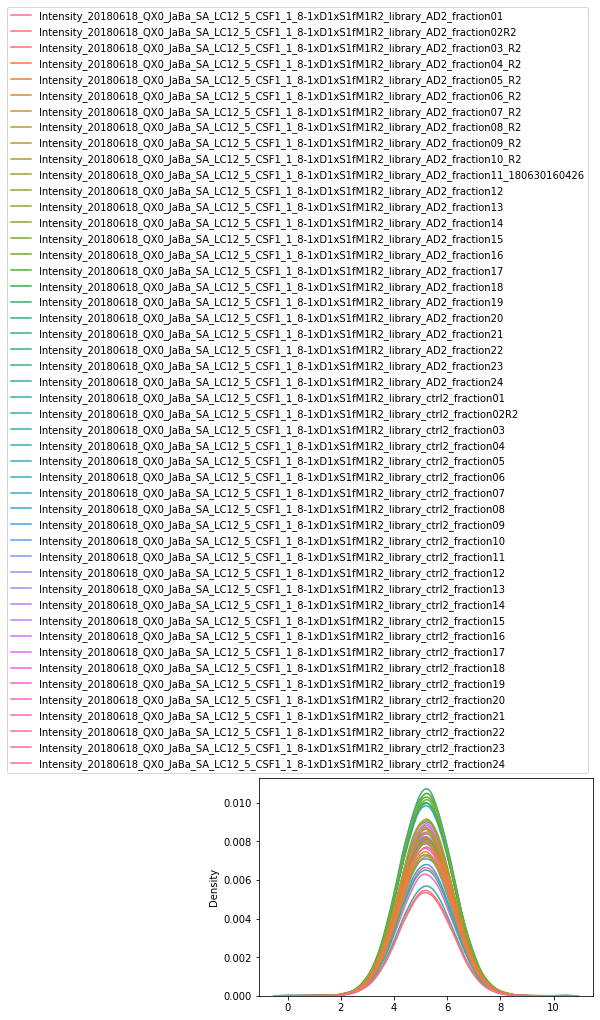

In [64]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [65]:
test = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD022545/new_quatn/QuantifiedPeptides.tsv", sep="\t")

In [66]:
test.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,4.283847e+05,3.168962e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,MSMS,MBR,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAAGDSDSWDADAFSVEDPVRK12|[5]Carbamyl[S],AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J_HUMAN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,MSMSIdentifiedButNotQuantified,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,1.234217e+07,6.172250e+06,2.858224e+07,4.003955e+06,2.743703e+06,9.909875e+06,MSMS,MSMS,MSMS,MBR,MBR,MSMS,NaN
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,NaN,NaN,1.722620e+05,8.826407e+05,5.701636e+05,2.057203e+05,1.041515e+05,8.438135e+04,MBR,MSMS,MBR,MBR,MBR,MBR,NaN
4,AAAAADLANRnan,AAAAADLANR,NaN,NaN,NaN,4.915239e+05,8.166335e+05,8.487790e+05,3.343901e+05,2.735426e+05,3.908921e+05,MBR,MBR,MBR,MBR,MBR,MSMS,NaN


In [67]:
cols = [col for col in test.columns if "Intensity" in col]

In [68]:
OA.quantile_transform(test, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,3.747996,3.604555,NaN,NaN,NaN,NaN,MSMS,MBR,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAAGDSDSWDADAFSVEDPVRK12|[5]Carbamyl[S],AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MSMSIdentifiedButNotQuantified,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,6.359181,6.025775,6.717583,6.221442,5.945158,6.583739,MSMS,MSMS,MSMS,MBR,MBR,MSMS,NaN
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,NaN,NaN,2.848182,4.564380,3.764244,4.078294,3.417163,2.961837,MBR,MSMS,MBR,MBR,MBR,MBR,NaN
4,AAAAADLANRnan,AAAAADLANR,NaN,NaN,NaN,3.882590,4.493755,4.144287,4.463368,4.252172,4.208500,MBR,MBR,MBR,MBR,MBR,MSMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34439,YYTVFDRDNNRnan,YYTVFDRDNNR,CATD_HUMAN,NaN,NaN,4.211923,3.894529,NaN,5.970146,6.118390,6.005929,MBR,MBR,NotDetected,MSMS,MBR,MBR,NaN
34440,YYTVFDRnan,YYTVFDR,CATD_HUMAN,NaN,NaN,6.498647,6.671135,6.637695,6.726838,6.576003,6.655466,MSMS,MSMS,MSMS,MBR,MSMS,MBR,NaN
34441,YYVTIIDAPGHRDFIKnan,YYVTIIDAPGHRDFIK,NaN,NaN,NaN,5.260293,5.511849,5.910164,4.698616,2.635724,5.712776,MBR,MBR,MSMS,MBR,MBR,MBR,NaN
34442,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,6.729463,6.811811,7.067291,6.577111,6.306970,7.086881,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN


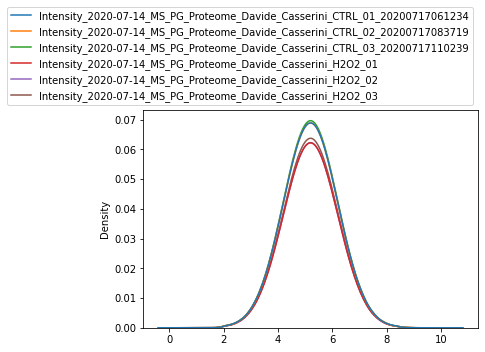

In [69]:
ax = sns.kdeplot(data=test[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [70]:
test[cols].sum()

Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234    133963.919955
Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719    133965.114135
Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239    135437.791552
Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01                   120963.307272
Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02                   121126.403965
Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03                   123957.813187
dtype: float64

In [71]:
test = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD022545/new_quatn/QuantifiedPeptides.tsv", sep="\t")

In [72]:
cols = [col for col in test.columns if "Intensity" in col]

In [73]:
median_centered = median_centering(test, cols)

In [74]:
median_centered

,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03
0,4.989300,4.346200,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,9.837845,8.629914,10.751857,8.176331,8.903886,9.625781
3,3.674997,5.824016,5.104258,3.893662,4.184517,2.749982
4,5.187654,5.711878,5.678271,4.594510,5.577599,4.961756
...,...,...,...,...,...,...
34439,5.684215,4.797795,NaN,7.558812,9.314043,8.213553
34440,10.193029,10.339913,10.544420,9.588254,10.512318,9.822465
34441,7.350728,7.461549,8.719310,5.016893,3.106765,7.590345
34442,10.854134,10.777091,11.808892,9.126354,9.783210,11.113790


<Axes: ylabel='Density'>

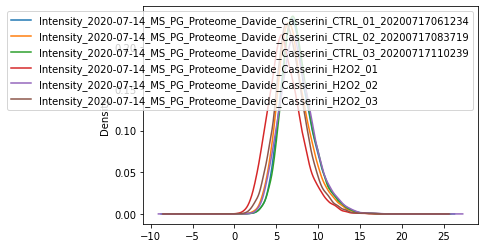

In [75]:
median_centered.plot.kde()

In [76]:
median_centered[cols].sum()

Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234    193460.990144
Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719    183782.497395
Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239    196796.462121
Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01                   142536.902589
Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02                   174999.962743
Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03                   161753.125050
dtype: float64